In [203]:

#yahoo finance ile beraber diğerki librari'ler import edildi

import imp
import numpy as np
import pandas as pd
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
#data aramamızda işimize yarayacak veriler bulundu
stock = "GC=F"
data = yf.download(stock,"2002-01-01","2022-01-18",auto_adjust=True)
data.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2001-12-31,276.799988,278.700012,276.799988,278.700012,2
2002-01-02,278.899994,278.899994,278.899994,278.899994,2
2002-01-03,278.200012,278.200012,278.200012,278.200012,2
2002-01-04,278.899994,278.899994,278.899994,278.899994,2
2002-01-07,278.600006,279.000000,278.600006,278.600006,1


In [205]:
#aldığımız datanın shapeine baktık
data.shape

(5034, 5)

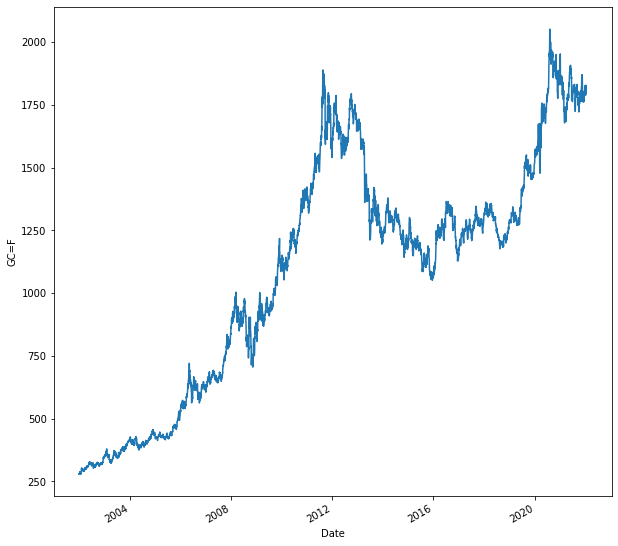

In [206]:
#datamızda close verisinin zamana göre değişimini inceleyen grafik yarrattık
data.Close.plot(figsize=(10,10))
plt.ylabel(stock)
plt.show()


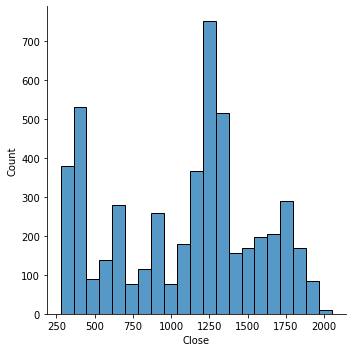

In [207]:
sns.displot(data["Close"])

c:\Users\Huawei D14\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

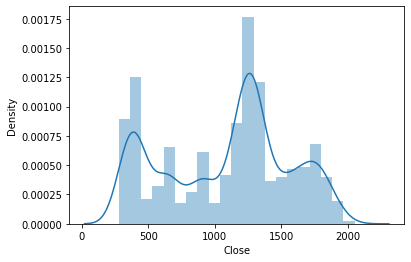

In [208]:
#"data["close"]" verisinin en yoğun olduğu yerlerin olduğu grafik aldık
sns.distplot(data["Close"])

c:\Users\Huawei D14\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

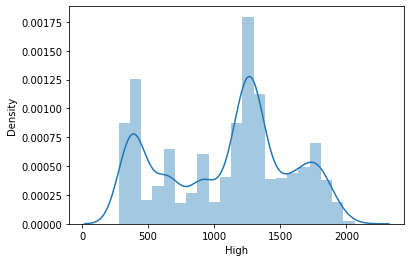

In [209]:
sns.distplot(data["High"])

In [210]:
#spliting data yaptık datayı 2'ye böldük
x = data.drop("Close",axis=1)
y = data["Close"]


In [211]:
#model olarak train_test modelini seçtik ve datamızın %20'sini test datası olarak kullanacağımızı belirttik
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [212]:
#train test datamızın boyutlarına baktık
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(4027, 4)
(1007, 4)
(4027,)
(1007,)


In [213]:
#linear regreesionu seçip predictionumuzu ona göre yapacağımızı söyleriz
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#regressionumuzu x_train ve y_train verilerine göre doldurun(fill) edin dedik
lr.fit(x_train,y_train)

#predict fonkyonunu çağırığ prediction yapmamızı sağlarız ve içine neye göre predict edeceğimiz veriyi(x_test) koyarız
prediction = lr.predict(x_test)

In [214]:
prediction.shape

(1007,)

In [215]:
print(prediction[9])
print(y_test[9])

334.27736227697807
333.20001220703125


In [216]:
from sklearn.metrics import mean_squared_error ,r2_score
#mse = predict verisiyle actual veri arasındaki ortalama değeri hesaplayan fonksyonumuzdur
#r2_score bizim verilerin ne ölçüde birbirleriyle bağlantılı olduğunu söyler
def calculate_metrics(y_test,preciction):

    mse = mean_squared_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)

    print("mse-->",mse)
    print("r2 score -->",r2)

calculate_metrics(y_test,prediction)




mse--> 17.029080442318993
r2 score --> 0.9999255308182817


In [217]:
d = int(input(" what"))
print(prediction[d])
print(y_test[d])
print(lr.score(x_test,y_test))

1204.0128571739415
1202.4000244140625
0.9999255308182817


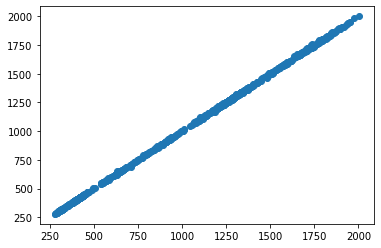

In [218]:
plt.scatter(prediction,y_test)
plt.show()

In [219]:
#model2
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train,y_train)

prediction= model.predict(x_test)
print(prediction.shape)
print(y_test.shape)

(1007,)
(1007,)


In [220]:
print("xgbr boot's prediction -->",prediction[55])
print("actual value -->",y_test[55])


xgbr boot's prediction --> 1191.8484
actual value --> 1197.199951171875


In [221]:
from sklearn.metrics import mean_squared_error ,r2_score
#mse = predict verisiyle actual veri arasındaki ortalama değeri hesaplayan fonksyonumuzdur
#r2_score bizim verilerin ne ölçüde birbirleriyle bağlantılı olduğunu söyler
def calculate_metrics(y_test,preciction):

    mse = mean_squared_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)

    print("mse-->",mse)
    print("r2 score -->",r2)

calculate_metrics(y_test,prediction)

mse--> 45.235661765811145
r2 score --> 0.9998021817603366


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


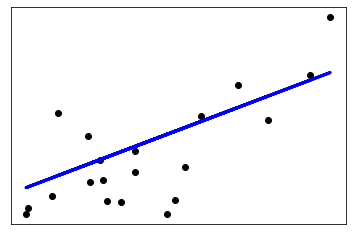

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [222]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())

plt.yticks(())

plt.show()

print(diabetes_y_test)